Import needed packages

In [1]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import nfl_data_py as nfl

In [2]:
pd.set_option('display.max_columns', None)

Get NFL play-by-play data from nfl_data_py a python library for data from nflfastR

In [3]:
nflpbp = nfl.import_pbp_data([2018, 2019, 2020, 2021, 2022], downcast=True, cache=False, alt_path=None)
nflpbp.shape

2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
Downcasting floats.


/Users/shaneregel/opt/anaconda3/lib/python3.8/site-packages/nfl_data_py/__init__.py:137: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  plays.loc[:, cols] = plays.loc[:, cols].astype(numpy.float32)


(243883, 384)

In [4]:
nflpbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

Get data for just Mark Andrews

In [5]:
mapbp = nflpbp[nflpbp['receiver_id']=='00-0034753'].copy() 
mapbp

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,td_player_name,td_player_id,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,vegas_wpa,vegas_home_wpa,home_wp_post,away_wp_post,vegas_wp,vegas_home_wp,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name,rushing_yards,lateral_receiver_player_id,lateral_receiver_player_name,lateral_receiving_yards,lateral_rusher_player_id,lateral_rusher_player_name,lateral_rushing_yards,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tack

In [6]:
mapbp.shape

(577, 384)

Group season stats to see if they match reasonably well with other sources 

In [7]:
# see what seasons of data we have
mapbp['season'].unique()

array([2018, 2019, 2020, 2021, 2022])

In [8]:
# see if games played matches other sources - includes playoffs
mapbp.groupby('season')['game_id'].nunique()

season
2018    17
2019    16
2020    16
2021    17
2022    16
Name: game_id, dtype: int64

In [9]:
list(mapbp.columns)

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

In [10]:
# see if some stats match other sources - includes playoffs
mapbp.groupby('season').agg({
    'game_id':'nunique',
    'pass_attempt':'sum',
    'touchdown':'sum',
    'complete_pass':'sum',
    'receiving_yards':'sum'
})

,game_id,pass_attempt,touchdown,complete_pass,receiving_yards
season,,,,,
2018,17,57.0,3.0,37.0,583.0
2019,16,105.0,10.0,68.0,891.0
2020,16,105.0,8.0,66.0,770.0
2021,17,158.0,9.0,107.0,1361.0
2022,16,124.0,5.0,78.0,920.0


Now get stats into 2 data frames 1. for Mark Andrews vs Steelers 2. for Mark Andrews vs everyone else

In [11]:
# dataframe for not Steelers games
mapbp_nfl = mapbp[mapbp['defteam']!='PIT']
mapbp_nfl.shape

(514, 384)

In [12]:
# dataframe for Steelers games
mapbp_pit = mapbp[mapbp['defteam']=='PIT']
mapbp_pit.shape

(63, 384)

Now get season totals for both

In [13]:
# vs rest of n
mapbp_nfl_tot = mapbp_nfl.groupby('season').agg({
    'game_id':'nunique',
    'pass_attempt':'sum',
    'touchdown':'sum',
    'complete_pass':'sum',
    'receiving_yards':'sum'
})
mapbp_nfl_tot = mapbp_nfl_tot.rename(columns={'game_id': 'games', 'pass_attempt': 'targets', 'touchdown': 'touchdowns', 'complete_pass': 'receptions'})
mapbp_nfl_tot

,games,targets,touchdowns,receptions,receiving_yards
season,,,,,
2018,15,49.0,3.0,32.0,521.0
2019,15,98.0,10.0,63.0,846.0
2020,15,99.0,8.0,63.0,738.0
2021,15,133.0,9.0,95.0,1226.0
2022,14,109.0,5.0,67.0,803.0


In [14]:
mapbp_pit_tot = mapbp_pit.groupby('season').agg({
    'game_id':'nunique',
    'pass_attempt':'sum',
    'touchdown':'sum',
    'complete_pass':'sum',
    'receiving_yards':'sum'
})
mapbp_pit_tot = mapbp_pit_tot.rename(columns={'game_id': 'games', 'pass_attempt': 'targets', 'touchdown': 'touchdowns', 'complete_pass': 'receptions'})
mapbp_pit_tot

,games,targets,touchdowns,receptions,receiving_yards
season,,,,,
2018,2,8.0,0.0,5.0,62.0
2019,1,7.0,0.0,5.0,45.0
2020,1,6.0,0.0,3.0,32.0
2021,2,25.0,0.0,12.0,135.0
2022,2,15.0,0.0,11.0,117.0


Now get per game stats for comparison

In [62]:
mapbp_nfl_pergm = pd.DataFrame()
mapbp_nfl_pergm['games'] = mapbp_nfl_tot['games']
mapbp_nfl_pergm['targets/game'] = mapbp_nfl_tot['targets']/mapbp_nfl_tot['games']
mapbp_nfl_pergm['touchdowns/game'] = mapbp_nfl_tot['touchdowns']/mapbp_nfl_tot['games']
mapbp_nfl_pergm['receptions/game'] = mapbp_nfl_tot['receptions']/mapbp_nfl_tot['games']
mapbp_nfl_pergm['rec yards/game'] = mapbp_nfl_tot['receiving_yards']/mapbp_nfl_tot['games']
mapbp_nfl_pergm = mapbp_nfl_pergm.round(decimals=2)
mapbp_nfl_pergm

,games,targets/game,touchdowns/game,receptions/game,rec yards/game
season,,,,,
2018,15,3.27,0.20,2.13,34.73
2019,15,6.53,0.67,4.20,56.40
2020,15,6.60,0.53,4.20,49.20
2021,15,8.87,0.60,6.33,81.73
2022,14,7.79,0.36,4.79,57.36


In [63]:
mapbp_pit_pergm = pd.DataFrame()
mapbp_pit_pergm['games'] = mapbp_pit_tot['games']
mapbp_pit_pergm['targets/game'] = mapbp_pit_tot['targets']/mapbp_pit_tot['games']
mapbp_pit_pergm['touchdowns/game'] = mapbp_pit_tot['touchdowns']/mapbp_pit_tot['games']
mapbp_pit_pergm['receptions/game'] = mapbp_pit_tot['receptions']/mapbp_pit_tot['games']
mapbp_pit_pergm['rec yards/game'] = mapbp_pit_tot['receiving_yards']/mapbp_pit_tot['games']
mapbp_pit_pergm = mapbp_pit_pergm.round(decimals=2)
mapbp_pit_pergm

,games,targets/game,touchdowns/game,receptions/game,rec yards/game
season,,,,,
2018,2,4.0,0.0,2.5,31.0
2019,1,7.0,0.0,5.0,45.0
2020,1,6.0,0.0,3.0,32.0
2021,2,12.5,0.0,6.0,67.5
2022,2,7.5,0.0,5.5,58.5


In [65]:
ma_tot_pergm = mapbp_nfl_pergm.merge(mapbp_pit_pergm, left_on='season', right_on='season')
ma_tot_pergm = ma_tot_pergm.rename(columns={'games_x': 'nfl_games',
                                            'targets/game_x': 'nfl_targ/gm', 
                                            'touchdowns/game_x': 'nfl_td/gm', 
                                            'receptions/game_x': 'nfl_rec/gm', 
                                            'rec yards/game_x': 'nfl_recyds/gm',
                                            'games_y': 'pit_games',
                                            'targets/game_y': 'pit_targ/gm',
                                            'touchdowns/game_y': 'pit_td/gm',
                                            'receptions/game_y': 'pit_rec/gm',
                                            'rec yards/game_y': 'pit_recyds/gm'}).reset_index()
ma_tot_pergm

,season,nfl_games,nfl_targ/gm,nfl_td/gm,nfl_rec/gm,nfl_recyds/gm,pit_games,pit_targ/gm,pit_td/gm,pit_rec/gm,pit_recyds/gm
0,2018,15,3.27,0.20,2.13,34.73,2,4.0,0.0,2.5,31.0
1,2019,15,6.53,0.67,4.20,56.40,1,7.0,0.0,5.0,45.0
2,2020,15,6.60,0.53,4.20,49.20,1,6.0,0.0,3.0,32.0
3,2021,15,8.87,0.60,6.33,81.73,2,12.5,0.0,6.0,67.5
4,2022,14,7.79,0.36,4.79,57.36,2,7.5,0.0,5.5,58.5


Build visualizations for each stat comparison

In [29]:
# targets
ma_tar = ma_tot_pergm[['season', 'nfl_targ/gm', 'pit_targ/gm']]
ma_tar

,season,nfl_targ/gm,pit_targ/gm
0,2018,3.27,4.0
1,2019,6.53,7.0
2,2020,6.60,6.0
3,2021,8.87,12.5
4,2022,7.79,7.5


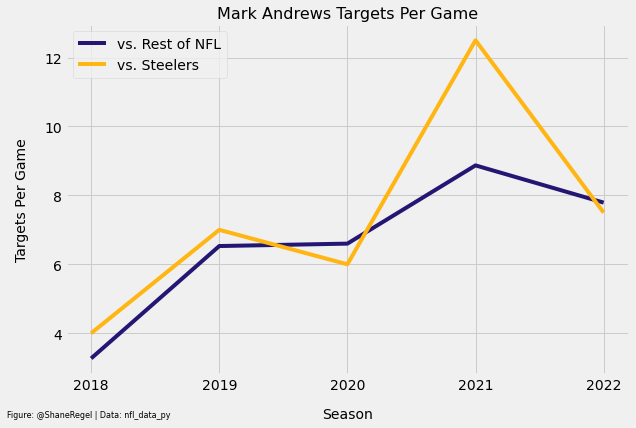

In [55]:
ma_tar.plot(x='season', color=['#241773', '#FFB612'])
plt.title('Mark Andrews Targets Per Game', fontdict={'fontsize':16})
plt.ylabel('Targets Per Game', fontdict={'fontsize':14}, labelpad=15)
plt.xticks(np.arange(2018, 2023, 1.0))
plt.xlabel('Season', fontdict={'fontsize':14}, labelpad=15)
plt.legend(labels=['vs. Rest of NFL', 'vs. Steelers'])
plt.gcf().set_size_inches(9, 6)
plt.figtext(-.01, -0.03, 'Figure: @ShaneRegel | Data: nfl_data_py', fontsize=8)
plt.style.use('fivethirtyeight')

In [56]:
# touchdowns
ma_td = ma_tot_pergm[['season', 'nfl_td/gm', 'pit_td/gm']]
ma_td

,season,nfl_td/gm,pit_td/gm
0,2018,0.20,0.0
1,2019,0.67,0.0
2,2020,0.53,0.0
3,2021,0.60,0.0
4,2022,0.36,0.0


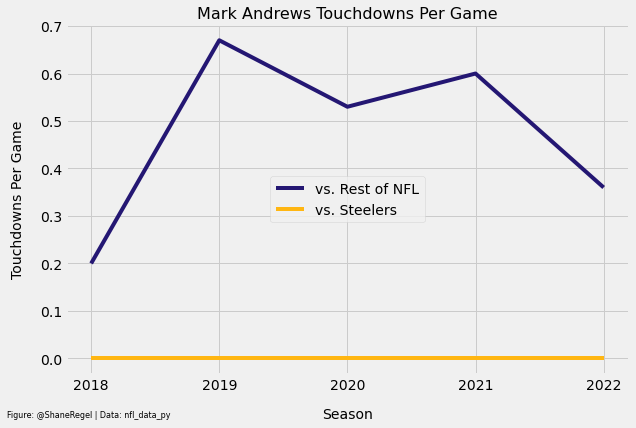

In [57]:
ma_td.plot(x='season', color=['#241773', '#FFB612'])
plt.title('Mark Andrews Touchdowns Per Game', fontdict={'fontsize':16})
plt.ylabel('Touchdowns Per Game', fontdict={'fontsize':14}, labelpad=15)
plt.xticks(np.arange(2018, 2023, 1.0))
plt.xlabel('Season', fontdict={'fontsize':14}, labelpad=15)
plt.legend(labels=['vs. Rest of NFL', 'vs. Steelers'])
plt.gcf().set_size_inches(9, 6)
plt.figtext(-.01, -0.03, 'Figure: @ShaneRegel | Data: nfl_data_py', fontsize=8)
plt.style.use('fivethirtyeight')

In [58]:
# receptions
ma_rec = ma_tot_pergm[['season', 'nfl_rec/gm', 'pit_rec/gm']]
ma_rec

,season,nfl_rec/gm,pit_rec/gm
0,2018,2.13,2.5
1,2019,4.20,5.0
2,2020,4.20,3.0
3,2021,6.33,6.0
4,2022,4.79,5.5


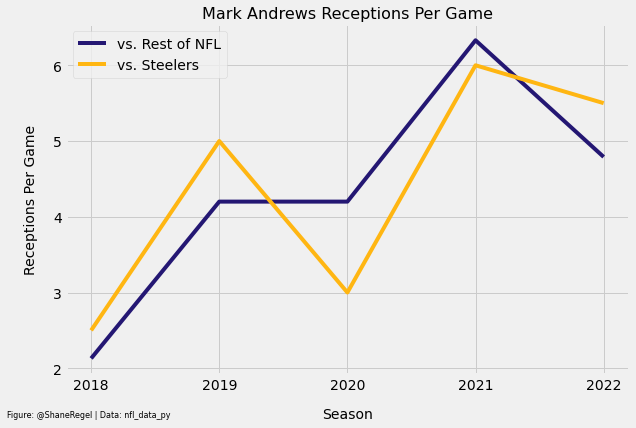

In [59]:
ma_rec.plot(x='season', color=['#241773', '#FFB612'])
plt.title('Mark Andrews Receptions Per Game', fontdict={'fontsize':16})
plt.ylabel('Receptions Per Game', fontdict={'fontsize':14}, labelpad=15)
plt.xticks(np.arange(2018, 2023, 1.0))
plt.xlabel('Season', fontdict={'fontsize':14}, labelpad=15)
plt.legend(labels=['vs. Rest of NFL', 'vs. Steelers'])
plt.gcf().set_size_inches(9, 6)
plt.figtext(-.01, -0.03, 'Figure: @ShaneRegel | Data: nfl_data_py', fontsize=8)
plt.style.use('fivethirtyeight')

In [60]:
# receptions
ma_recyds = ma_tot_pergm[['season', 'nfl_recyds/gm', 'pit_recyds/gm']]
ma_recyds

,season,nfl_recyds/gm,pit_recyds/gm
0,2018,34.73,31.0
1,2019,56.40,45.0
2,2020,49.20,32.0
3,2021,81.73,67.5
4,2022,57.36,58.5


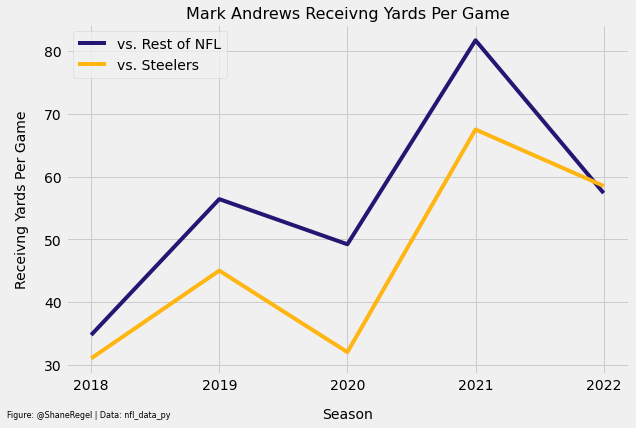

In [61]:
ma_recyds.plot(x='season', color=['#241773', '#FFB612'])
plt.title('Mark Andrews Receivng Yards Per Game', fontdict={'fontsize':16})
plt.ylabel('Receivng Yards Per Game', fontdict={'fontsize':14}, labelpad=15)
plt.xticks(np.arange(2018, 2023, 1.0))
plt.xlabel('Season', fontdict={'fontsize':14}, labelpad=15)
plt.legend(labels=['vs. Rest of NFL', 'vs. Steelers'])
plt.gcf().set_size_inches(9, 6)
plt.figtext(-.01, -0.03, 'Figure: @ShaneRegel | Data: nfl_data_py', fontsize=8)
plt.style.use('fivethirtyeight')